# 1. CSV Metadata Extraction 

To extract the metadata you should choose one of the 2 options: <br>
    a. Extract the Metadat by traversing through all the files. <br>
    b. Open the CSV file to use the already extracted metadata. <br>
    
Option 1 takes ~2 hours to run 

This Piece of code helps in extracting the metadat of all the CSV Files at a folder.
Taking forward Margaret's Week 1 Code. The code extracts the shape of the files and the first coloumn names. 

In [1]:
import os
import pandas as pd
import time
import glob 
import csv

## Part 1. Extract the Metadata -1 by traversing through all the files (20 Mins)

In [2]:
#path = "F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs"
path = "F:/Environmental Baseline Data/Version 2/Data/CSV"


all_paths = os.listdir(path)
#all_paths_folder = [path +  '/' + str(x) for x in all_paths]
all_paths_folder = [path]

In [3]:
#path = "F:/D&IMBU/DataScience/2019.10.07 - Environmental Baseline Team Project/Demo Deliverables/Demo ubc csvs"
#all_paths = os.listdir(path)
# all_paths_folder = [path +  '/' + str(x) for x in all_paths]




# Try Using glob.glob instead 
# flat_list_csv = glob.glob(path+'\*.pdf')
# flat_list_csv
all_paths_csv = []
for file_path in all_paths_folder:
    all_paths = os.listdir(file_path)
    all_paths_full = [file_path + '/' + y for y in all_paths]
    all_paths_csv.append(all_paths_full)

flat_list_csv = [item for sublist in all_paths_csv for item in sublist]

In [4]:
# example = flat_list_csv[8:16]
len(flat_list_csv)
# flat_list_csv1 = flat_list_csv[3:22]

# flat_list_csv

file = flat_list_csv[1]
file_handler = pd.read_csv(file, header = 0)
file_name = file.split('/')[-1]


In [5]:
shape_list = []
for file in flat_list_csv:
    try:
        file_handler = pd.read_csv(file, header = 0)
               
        shape = (list(file_handler.shape))
        
        file_name = file.split('/')[-1][:-4]
        shape.append(file_name)
        
        shape.append(file_handler.head(1))
        shape1 = shape.insert(0, file)
        shape_list.append(shape)
        
        
        # file_handler.close() --- Check if qwe need to close the handler or in Pandas you needn't close the handler
        #with open(x, "rb") as f:
        #reader = csv.reader(f)
        #i = reader.next()
        #rest = [row for row in reader]
        
    except:
        pass
#        shape = (0, 0, 'N/A')
#        shape1 = shape.insert(0, file)
#        shape_list.append(shape) 


In [6]:
df = pd.DataFrame(shape_list, columns =['Link', 'Row_Numbers', 'Coloumn_Numbers', 'File_Name', 'Coloumn_Names']) 

postal_series = df['Link'].str.extract('(A\d\D...)')
df.insert(1, 'Postal', postal_series)

df.head(5)
len(df)

25052

The dataframe is saved in a locan CSV file. It is highly recommended to have a look at the csv file before going forward. 

In [7]:
os.chdir(path + " Metadata")
df.to_csv('Shape_UBC_Baseline.csv')

## Part 2. Extract the Metadata -2 by traversing through all the files (30 mins)

In [8]:
all_paths_csv = []
for x in all_paths_folder:
    all_paths = os.listdir(x)
    all_paths_full = [x + '/' + y for y in all_paths]
    all_paths_csv.append(all_paths_full)
len(all_paths_csv)

len(flat_list_csv)

#full path for each csv file
flat_list_csv = [item for sublist in all_paths_csv for item in sublist]  
len(flat_list_csv)

25077

In [10]:
#go through each full path and grab the column names and create a new dataframe

Max_No_of_coloumns = 0
coloumnList = []
for file in flat_list_csv:
            
    try:
        file_handler = pd.read_csv(file)
        file_handler.insert(0, file, file)
           
        Col_List = file_handler.columns.tolist()
        coloumnList.append(Col_List)
        if len(Col_List) > Max_No_of_coloumns:
            Max_No_of_coloumns = len(Col_List)
    except:
        pass
Col_Names = ['Link']
for i in range(0,Max_No_of_coloumns-1):
    Col_Names.append('Col ' + str(i+1))
    
Col_Names

['Link',
 'Col 1',
 'Col 2',
 'Col 3',
 'Col 4',
 'Col 5',
 'Col 6',
 'Col 7',
 'Col 8',
 'Col 9',
 'Col 10',
 'Col 11',
 'Col 12',
 'Col 13',
 'Col 14',
 'Col 15',
 'Col 16',
 'Col 17',
 'Col 18',
 'Col 19',
 'Col 20',
 'Col 21',
 'Col 22',
 'Col 23',
 'Col 24',
 'Col 25',
 'Col 26',
 'Col 27',
 'Col 28',
 'Col 29',
 'Col 30',
 'Col 31',
 'Col 32',
 'Col 33',
 'Col 34',
 'Col 35',
 'Col 36',
 'Col 37',
 'Col 38',
 'Col 39',
 'Col 40',
 'Col 41',
 'Col 42',
 'Col 43',
 'Col 44',
 'Col 45',
 'Col 46',
 'Col 47',
 'Col 48',
 'Col 49',
 'Col 50',
 'Col 51',
 'Col 52',
 'Col 53',
 'Col 54',
 'Col 55',
 'Col 56',
 'Col 57',
 'Col 58',
 'Col 59',
 'Col 60',
 'Col 61',
 'Col 62',
 'Col 63',
 'Col 64',
 'Col 65',
 'Col 66',
 'Col 67',
 'Col 68',
 'Col 69',
 'Col 70',
 'Col 71',
 'Col 72',
 'Col 73',
 'Col 74',
 'Col 75']

In [11]:
coloumnList

[['F:/Environmental Baseline Data/Version 2/Data/CSV/A0H8C0 %2D 13.0 EIA %2D Section 13.1 to 13.6 -page-100-table-1.csv',
  'Assessment Scenario',
  'Issue',
  'Magnitude/Extent1',
  'Duration2',
  'Reversible/ Non-Reversible3',
  'Potential for Measurable Contribution to Cumulative Effects4'],
 ['F:/Environmental Baseline Data/Version 2/Data/CSV/A0H8C0 %2D 13.0 EIA %2D Section 13.1 to 13.6 -page-101-table-1.csv',
  'Site Series',
  'Hypothetical Baseline',
  'Unnamed: 2',
  'Baseline',
  'Unnamed: 4',
  'Construction',
  'Unnamed: 6',
  'Unnamed: 7',
  'Operations With Project',
  'Unnamed: 9',
  'Unnamed: 10',
  'Operations, Without Project',
  'Unnamed: 12',
  'Unnamed: 13'],
 ['F:/Environmental Baseline Data/Version 2/Data/CSV/A0H8C0 %2D 13.0 EIA %2D Section 13.1 to 13.6 -page-105-table-1.csv',
  'Structural Stage',
  'Hypothetical Baseline',
  'Unnamed: 2',
  'Baseline',
  'Unnamed: 4',
  'Construction',
  'Unnamed: 6',
  'Unnamed: 7',
  'Operations without Project',
  'Unnamed: 9

In [12]:
df_coloumns = pd.DataFrame(coloumnList, columns = Col_Names) 

In [13]:
os.chdir(path + " Metadata")
df_coloumns.to_csv('coloumn_Names_UBC_Baseline.csv')

In [14]:
df_coloumns.head(6)

,Link,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,...,Col 66,Col 67,Col 68,Col 69,Col 70,Col 71,Col 72,Col 73,Col 74,Col 75
0,F:/Environmental Baseline Data/Version 2/Data/...,Assessment Scenario,Issue,Magnitude/Extent1,Duration2,Reversible/ Non-Reversible3,Potential for Measurable Contribution to Cumul...,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,F:/Environmental Baseline Data/Version 2/Data/...,Site Series,Hypothetical Baseline,Unnamed: 2,Baseline,Unnamed: 4,Construction,Unnamed: 6,Unnamed: 7,Operations With Project,...,None,None,None,None,None,None,None,None,None,None
2,F:/Environmental Baseline Data/Version 2/Data/...,Structural Stage,Hypothetical Baseline,Unnamed: 2,Baseline,Unnamed: 4,Construction,Unnamed: 6,Unnamed: 7,Operations without Project,...,None,None,None,None,None,None,None,None,None,None
3,F:/Environmental Baseline Data/Version 2/Data/...,Assessment Scenario,Issue/ Measurable Parameter,Magnitude/ Extent1,Duration2,Reversible/ Non-Reversible3,Potential for Measurable Contribution to Cumul...,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,F:/Environmental Baseline Data/Version 2/Data/...,Assessment Scenario,Issue/Measurable Parameter,Magnitude/ Extent1,Duration2,Reversible/ Non-Reversible3,Potential for Measurable Contribution to Cumul...,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,F:/Environmental Baseline Data/Version 2/Data/...,Assessment Scenario,Issue,Magnitude/Extent1,Duration2,Reversible/ Non-Reversible3,Potential for Measurable Contribution to Cumul...,None,None,None,...,None,None,None,None,None,None,None,None,None,None


# 3. Plotting the shape of the csv files 

Ref -> https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib


Read the reference to add annotations on hovering for more interesting tooltip visualizations. 
It didn't work so well for Jupyter notebook for me.

In [15]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

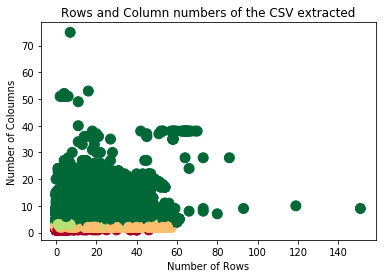

In [16]:
fig,ax = plt.subplots()

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

sc = plt.scatter(df['Row_Numbers'],df['Coloumn_Numbers'],c=df['Coloumn_Numbers'], s=100, cmap=cmap, norm=norm)
plt.xlabel('Number of Rows')
plt.ylabel('Number of Coloumns')
plt.title('Rows and Column numbers of the CSV extracted')

plt.show()

Code is continued in 2. EDA on CSV - Topic Modelling